#    How to explore data with real example.
###    Data Analysis of Uber trip data using Python Pandas (and a little of Seaborn).

       This is a sheet cheat of "how to firstly approach the data" applied and explained on a real dataset.

In [83]:
# Make a section to import the necessary libraries.

import pandas as pd
import seaborn as sns

In [2]:
# Loading the file into memory.

data = pd.read_csv('uber-raw-data-apr14.csv')

You can download the data from here:
https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-apr14.csv

And this is the video I used to help me applying some methods:
https://www.youtube.com/watch?v=Q73ADVZCqSU&list=PLz2ZozgFMZ7uUK4vgD1PsGuhThH6AuCeX&index=5&t=566s

###  1 - Start exploring the data.
        Here We just want to see how it is organized, so in the next step We'll be able to know how and where to 
    manipulate the data (according to the Questions we want to respond).

In [3]:
# Number of Rows and Columns. 

data.shape

(564516, 4)

In [4]:
# It returns the first N number of rows when head(N). Without a number it returns 5.

data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
# It returns the last... 
'''
    In this case, We don't really need it, since We just used .head(), but it can come in handy sometime.
'''

data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [7]:
# It returns an object with all of the column headers.
'''
    But since our DataFrame is small, We could also not use it, because We could already see all the column names using
    .head() or .tail(). However, some datasets have a lot of columns.
'''

data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [8]:
# Basic information on all columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
# It gives basic statistics on numeric columns.
'''
    Not really usefull for us in this analysis.
'''

data.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [10]:
# It shows the data type (float, int, string, bool...).
'''  
    .info() had shown us the data type, then We could've just skipped this part. On the other hand...
'''

data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [11]:
'''
    ...You can use it sometime in the future or to know the type of a specific column.
'''

data.Lat.dtypes

dtype('float64')

In [13]:
# It shows which values are null.
'''
    Yeah, We can't really see or analyze the whole frame... imagine yourself doing this in a spreadcheat 
    with 200,000 rows and 180 columns... (°-° ) but it is useful in other ways
'''
# curiosity: .isna() does the same as .isnull()
# Check this out: https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

data.isnull()

,Date/Time,Lat,Lon,Base
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
564511,False,False,False,False
564512,False,False,False,False
564513,False,False,False,False
564514,False,False,False,False


In [14]:
# It shows which columns have null values.
'''
    And as you can see, this lucky DataFrame has no null values.
'''

data.isnull().any()

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

In [15]:
# Same result as before.

data.isna().any()

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

In [16]:
# It would show the sum of na/null/NaN values if this dataset had some.

data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [18]:
# A way you can know the percentage of null values in each column.

data.isnull().sum() / data.shape[0]

Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005B1D248>,
      dtype=object)

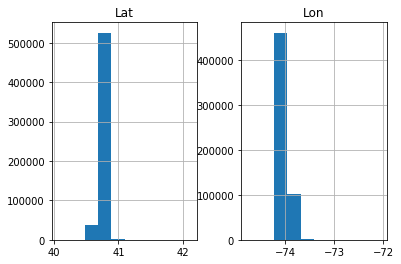

In [20]:
# It plots histograms for all numeric columns.
'''
    Also not so useful right now. In other datasets We can have a fast understand looking at charts.
'''

data.hist() 

### 2 - Manipulating the data.
#### 2.1 Convert datetime and add some useful columns¶


In [49]:
'''
    ['Lat'] and ['Lon'] are numeric columns, but ['Date/Time'] is a string, then We'll convert it to datetime, so
    it's better for us to use it. 
    To understand what I'll do, first, take a look at this:

'''
# 1
date_time = '4/1/2014 0:11:00'
date = date_time.split(' ')
print('1 - date_time is now a list: ', date)

'''
    We can separate it in these respective variables: 
'''
# 2
date, time = date_time.split(' ')
print('\n2 - date: ', date, '\n', '   time: ', time)

'''
    And We can also keep sliping to get more specific data if we need
'''
# 3
date = date.split('/')
print('\n3 - date splitted: ', date)
print('\n date[0]: ', date[0])

1 - date_time is now a list:  ['4/1/2014', '0:11:00']

2 - date:  4/1/2014 
    time:  0:11:00

3 - date splitted:  ['4', '1', '2014']

 date[0]:  4


In [55]:
'''
    To do it more efficiently and with more functionality:
'''
date_time = pd.to_datetime(date_time)
date_time

Timestamp('2014-04-01 00:11:00')

In [86]:
# An exemple of functionality. There are more and you can search

date_time.day_name()

'Tuesday'

        Finally converting ['Date/Time'] column into "datetime"

In [99]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

data['Date/Time'][0].day_name()

'Tuesday'

        Creating new columns

In [119]:
def get_month_day(date_time):
    return date_time.day

# Using .map() to apply the function on the DataFrame ['Date/Time'] Series

data['Day_of_month'] = data['Date/Time'].map(get_month_day)

data.head(3)

,Date/Time,Lat,Lon,Base,Day_of_month,Week_day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0


In [118]:
def get_week_day(date_time):
    return date_time.weekday()

data['Week_day'] = data['Date/Time'].map(get_week_day)

data.head(3)

,Date/Time,Lat,Lon,Base,Day_of_month,Week_day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0


In [120]:
def get_hour(date_time):
    return date_time.hour

data['Hour'] = data['Date/Time'].map(get_hour)

data.tail(3)

,Date/Time,Lat,Lon,Base,Day_of_month,Week_day,Hour
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### 3 - Analysis.
        Now that we have prepared the data, we can make histograms to understand what the data looks like.

#### 3.1 Analyze 'Day_of_month'
        Building up the charts.

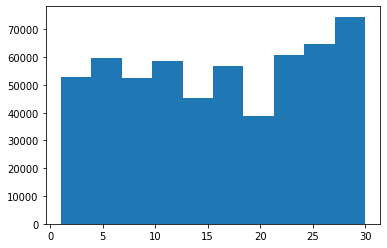

In [129]:
hist(data.Day_of_month)

plt.show()

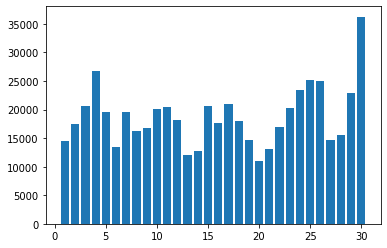

In [145]:
'''
    By default histograms have 10 bins, but as we know there are 30 days... (and let's also reshape it a little)
'''
hist(data.Day_of_month, bins=30, rwidth=0.8, range=(0.5,30.5))

plt.show()

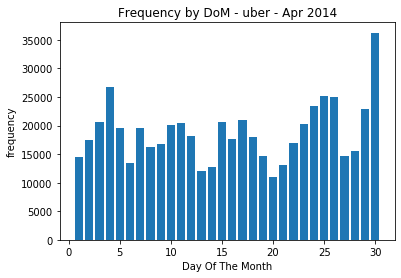

In [159]:
hist(data.Day_of_month, bins=30, rwidth=0.8, range=(0.5,30.5))

# New
xlabel('Day Of The Month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

plt.show()

In [186]:
'''
    We grouped the whole DataFrame by the Day_of_month. That means for day 1 we have all of this rows that are in day 1
    range. Same for day 2 and so on... and if You look closer, this matches the previous histogram we did.
    
    len() is responsable for give us the number of records in each day.
'''

for day, rows in data.groupby('Day_of_month'):
    print(day, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [187]:
'''
    If you get rid of len() You'll have ALL the records from ALL of the 30 days
'''

for day, rows in data.groupby('Day_of_month'):
    print(day, rows)

1                  Date/Time      Lat      Lon    Base  Day_of_month  Week_day  \
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512             1         1   
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512             1         1   
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512             1         1   
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512             1         1   
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512             1         1   
...                    ...      ...      ...     ...           ...       ...   
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764             1         1   
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764             1         1   
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764             1         1   
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764             1         1   
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764             1         1   

        Hour  
0          0  
1      

[16975 rows x 7 columns]
23                  Date/Time      Lat      Lon    Base  Day_of_month  Week_day  \
24626  2014-04-23 00:00:00  40.7499 -73.9901  B02512            23         2   
24627  2014-04-23 00:00:00  40.7499 -73.9901  B02512            23         2   
24628  2014-04-23 00:01:00  40.7214 -73.8435  B02512            23         2   
24629  2014-04-23 00:07:00  40.7411 -73.9865  B02512            23         2   
24630  2014-04-23 00:25:00  40.7441 -73.9841  B02512            23         2   
...                    ...      ...      ...     ...           ...       ...   
561814 2014-04-23 23:31:00  40.7379 -73.9935  B02764            23         2   
561815 2014-04-23 23:44:00  40.7683 -73.8622  B02764            23         2   
561816 2014-04-23 23:46:00  40.6764 -74.0162  B02764            23         2   
561817 2014-04-23 23:49:00  40.7647 -73.9956  B02764            23         2   
561818 2014-04-23 23:51:00  40.7078 -73.9469  B02764            23         2   

        Hou

In [189]:
'''
    And if you break the loop, You'll get ALL the record from day 1 only (since it'll break right after the first day)
'''

for day, rows in data.groupby('Day_of_month'):
    print(day, rows)
    break

1                  Date/Time      Lat      Lon    Base  Day_of_month  Week_day  \
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512             1         1   
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512             1         1   
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512             1         1   
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512             1         1   
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512             1         1   
...                    ...      ...      ...     ...           ...       ...   
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764             1         1   
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764             1         1   
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764             1         1   
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764             1         1   
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764             1         1   

        Hour  
0          0  
1      

In [198]:
'''
    In case we want to automatize it in order to this often, we can
'''
 
def count_rows(rows):
    return len(rows)

by_day = data.groupby('Day_of_month').apply(count_rows)
by_day

Day_of_month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [197]:
'''And now we can just reproduce it in any .groupby() as we want'''

data.groupby('Week_day').apply(count_rows)

Week_day
0     60861
1     91185
2    108631
3     85067
4     90303
5     77218
6     51251
dtype: int64

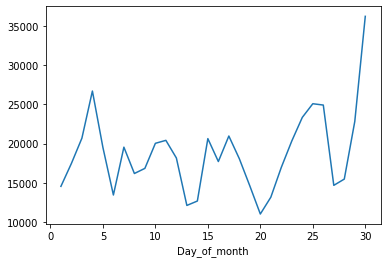

In [202]:
'''
    And now we can use this to do more analysis and discover new things or confirm old theories.
    Therefore, it's important to have knowledge on statistics and how and when to use determined types of graphs.
    So we'll be able to utilize these tools efficiently.
'''

by_day.plot()

plt.show()

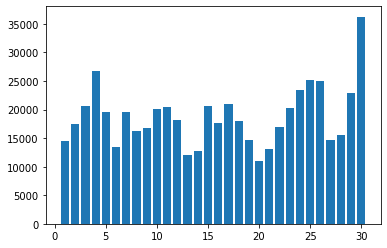

In [206]:
'''
    As you can see, we've been working on the same chart. And for each modification in the data the approach has also
    to be different (in this case, we have to add the X axis (range), because we have changed the format of the data),
    but the results are the same.
'''

bar(range(1,31),by_day)

plt.show()

In [209]:
# Sorting the values can help us to have the "same" chart, in a diferent way
by_day_sorted = by_date.sort_values()
by_day_sorted

Day_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

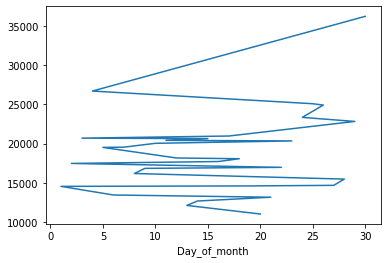

In [216]:
by_day_sorted.plot()
plt.show()

[]

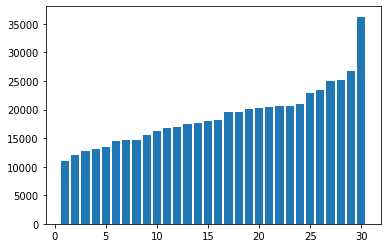

In [215]:
bar(range(1,31), by_day_sorted)
plt.plot()

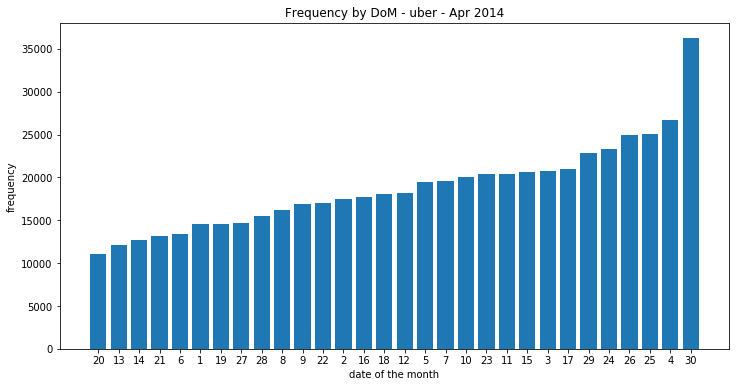

In [235]:
plt.figure(figsize=(12,6))

bar(range(1, 31), by_day_sorted)
xticks(range(1,31), by_day_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

plt.show()

#### 3.2 Analyze 'Hour'
 

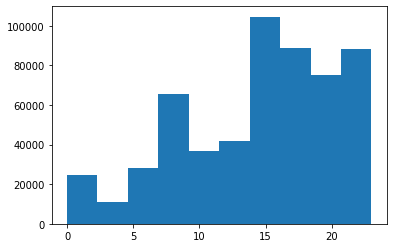

In [238]:
hist(data.Hour)
plt.show()

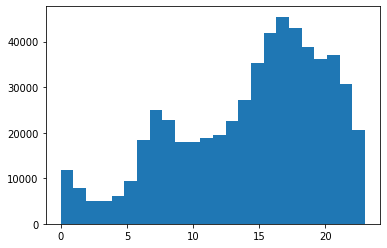

In [245]:
''' By default, bins=10, but as we know there are 24 hours: '''
hist(data.Hour, bins=24)
plt.show()

### 3.3 Analyze 'Week_day': A change of approach.
        Let's change the histogram step by step and see how it is affected.
        You don't really need to learn this by heart, it's only interesting for you to see it.

(array([ 60861.,  91185.,      0., 108631.,      0.,  85067.,  90303.,
             0.,  77218.,  51251.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

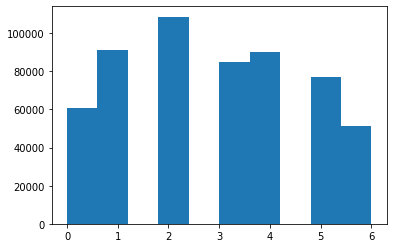

In [248]:
hist(data.Week_day)

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

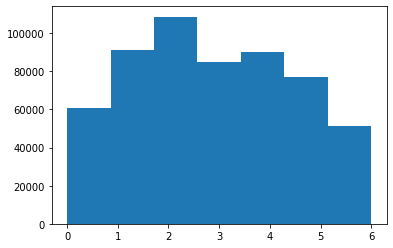

In [249]:
hist(data.Week_day, bins=7)

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

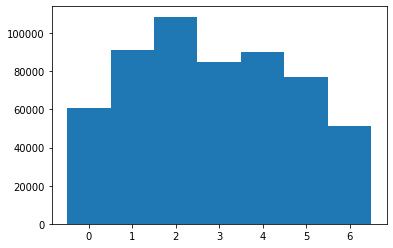

In [255]:
hist(data.Week_day, bins=7, range=(-.5,6.5))

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

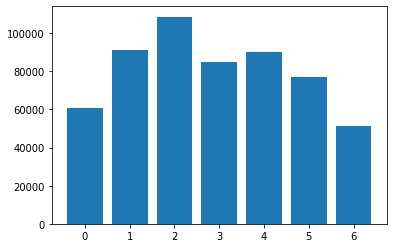

In [256]:
hist(data.Week_day, bins=7, range =(-.5,6.5), rwidth=.8)

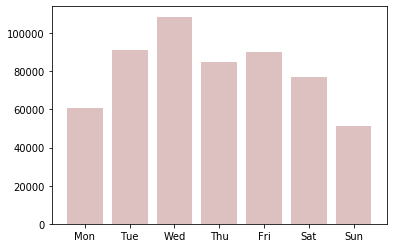

In [262]:
hist(data.Week_day, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

### Cross Analysis

In [288]:
'''
    A hierarchical .groupby() + .apply() the count_rows() function we did before
'''

data.groupby(['Week_day', 'Hour']).apply(count_rows)

Week_day  Hour
0         0        518
          1        261
          2        238
          3        571
          4       1021
                  ... 
6         19      2579
          20      2276
          21      2310
          22      1639
          23      1018
Length: 168, dtype: int64

In [293]:
by_cross = data.groupby(['Week_day', 'Hour']).apply(count_rows).unstack()
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


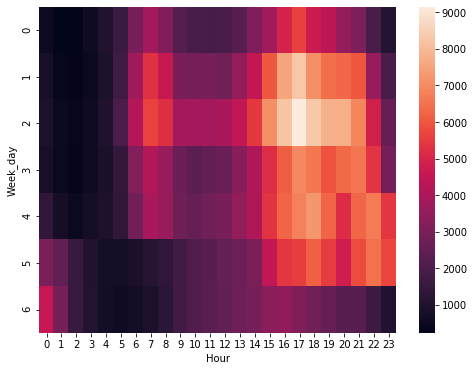

In [306]:
'''
    Basically, The clear areas mean Uber activity while the dark areas mean there's little or even 0 of activity.
'''

figure(figsize=(8,6))
sns.heatmap(by_cross)

plt.show()

### Extra cool thing
        As ['Lon'] and ['Lat'] are coordinates, We can actually plot them to see the 'mapping'.

(40.7, 40.86)

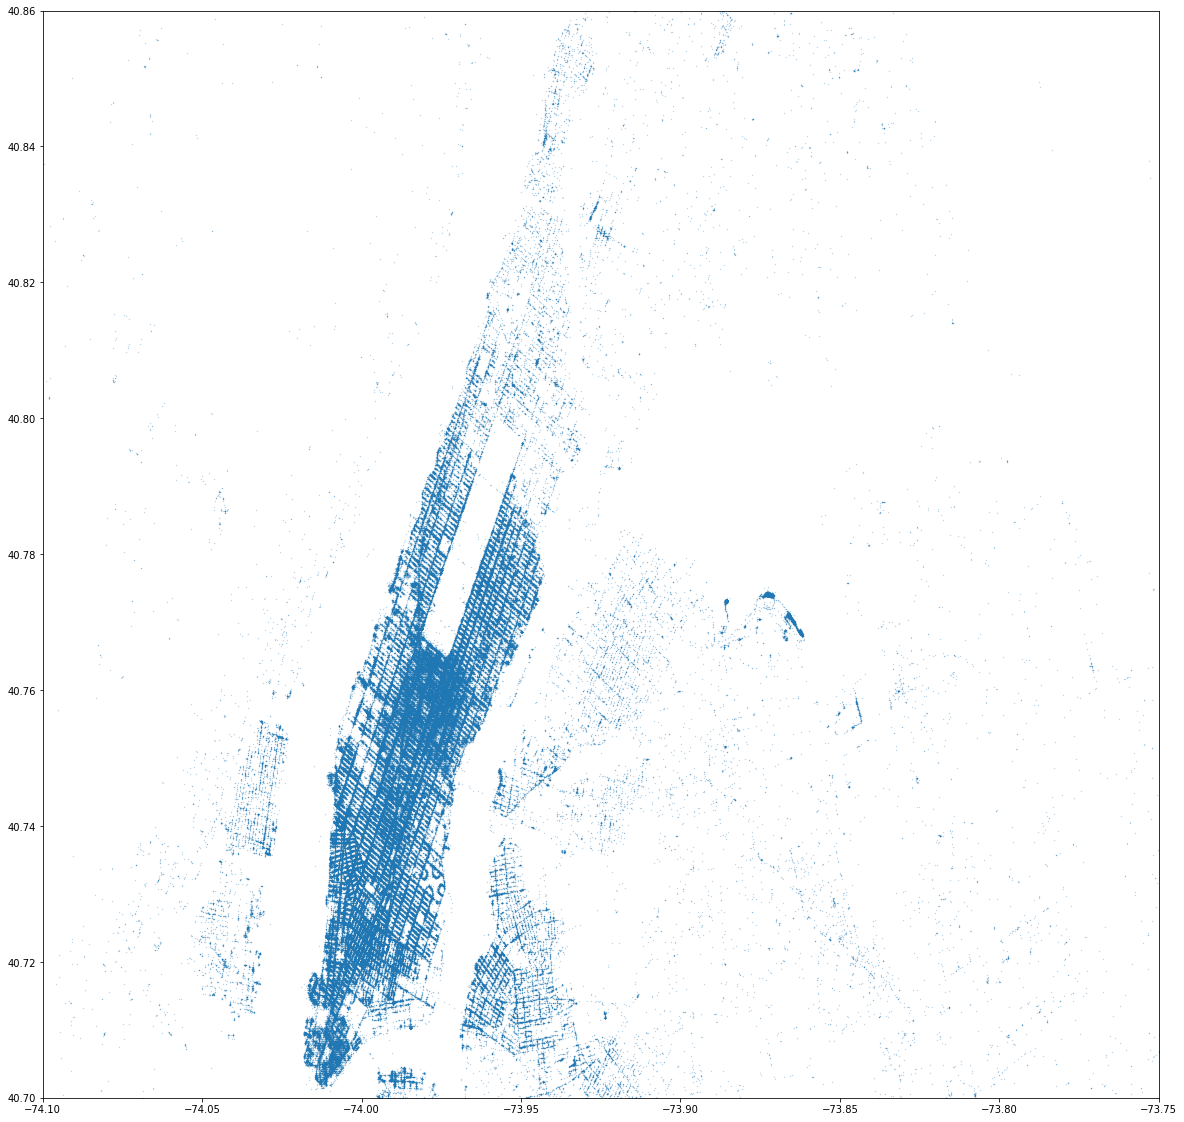

In [338]:
# It' Manhattan

figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', markersize=0.5, alpha=0.5)
xlim(-74.1, -73.75)
ylim(40.7, 40.860)

(40.7, 40.86)

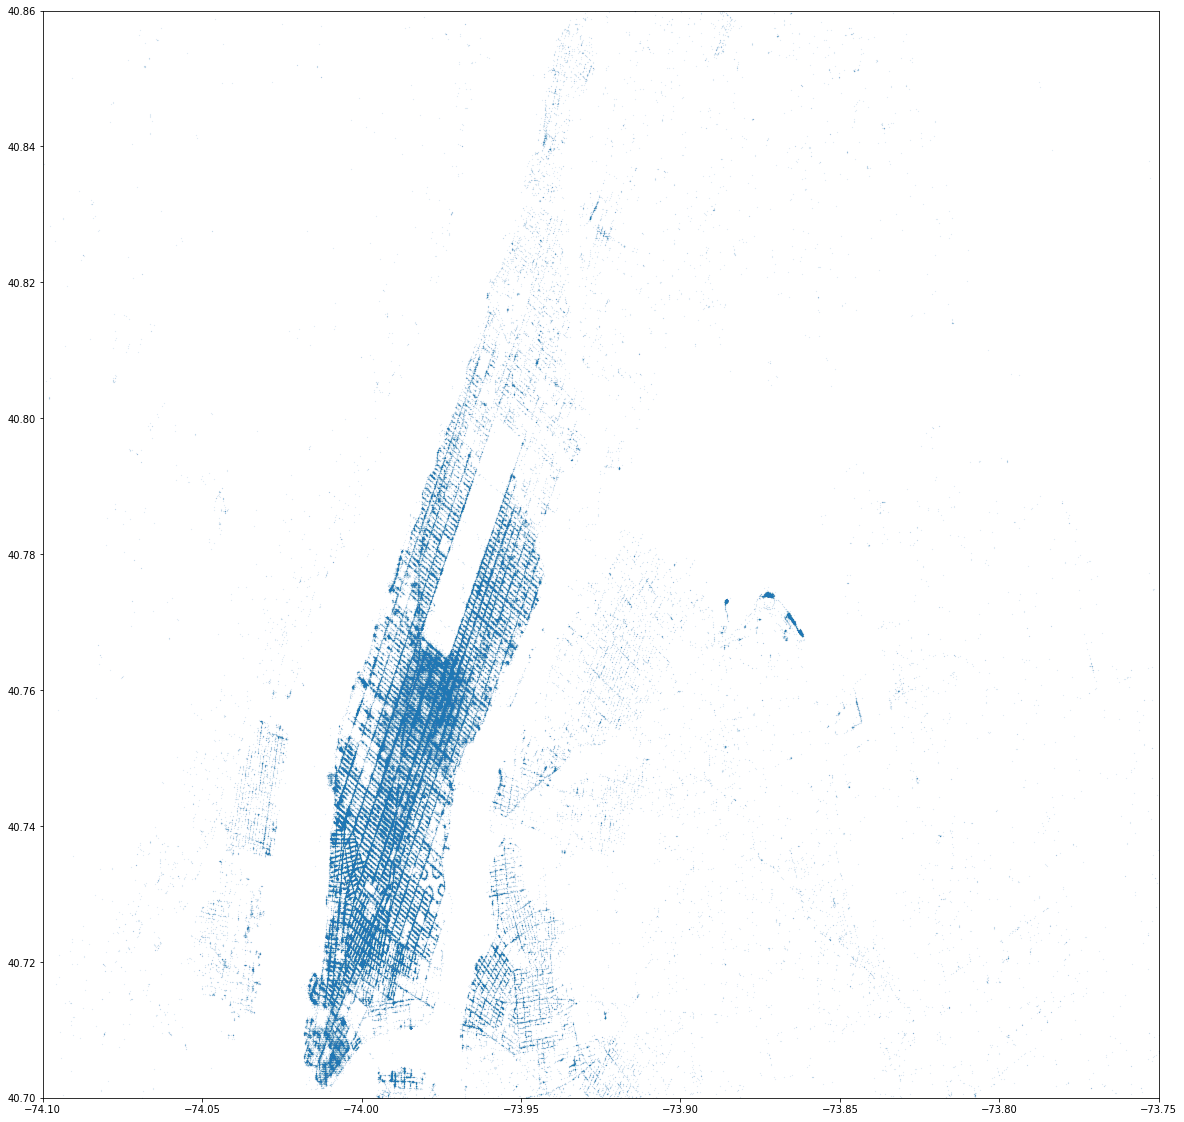

In [335]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', markersize=0.2, alpha=.5)
xlim(-74.1, -73.75)
ylim(40.7, 40.860)